<a href="https://colab.research.google.com/github/mingusmingus/MONET/blob/main/Proyecto/MONET_v1_0_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

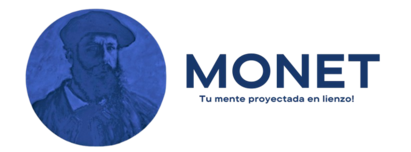

In [ ]:

#--------------------------------------------------------------------------------------#
# IMPLEMENTACIÓN DE GUI CON GRADIO                                                     #
#--------------------------------------------------------------------------------------#


# Instalación de bibliotecas para generación de texto e imágenes

Este conjunto de comandos permite instalar las bibliotecas necesarias para trabajar con modelos de inteligencia artificial, específicamente para la generación de texto e imágenes.

In [ ]:
# Instalar Hugging Face Transformers y Diffusers para generación de texto e imágenes
!pip install transformers diffusers accelerate torch torchvision

# Instalar TextBlob para detección de emociones
!pip install textblob

# Descargar datos de entrenamiento para TextBlob (necesario para análisis de texto)
!python -m textblob.download_corpora

# Instalar deep-translator y Gradio
!pip install deep-translator gradio

# Carga de modelos para clasificación de emociones y generación de imágenes

Este conjunto de comandos permite cargar dos modelos clave para el procesamiento de texto y la generación de imágenes:

## Modelos Cargados

1. **Clasificador de Emociones**:
   - Se carga un modelo de clasificación de texto de Hugging Face, específicamente el modelo **"j-hartmann/emotion-english-distilroberta-base"**.
   - Este modelo se utiliza para detectar emociones en textos.

2. **Stable Diffusion**:
   - Se carga el modelo **Stable Diffusion** de la versión **"runwayml/stable-diffusion-v1-5"**.
   - Este modelo se utiliza para generar imágenes basadas en descripciones de texto.
   - El modelo se ejecuta en una GPU **CUDA** para mejorar el rendimiento.


In [ ]:
from transformers import pipeline
from deep_translator import GoogleTranslator
from diffusers import StableDiffusionPipeline

# Cargar el modelo de clasificación de emociones
clasificador_emociones = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)

# Cargar el modelo Stable Diffusion
modelo_sd = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5").to("cuda")

# Funciones para detección de emociones y generación de imágenes

Este conjunto de funciones permite detectar emociones en un texto y generar imágenes basadas en esas emociones. A continuación, se detalla su funcionamiento:

## 1. Detección de Emociones

La función `detectar_emocion` realiza lo siguiente:

- **Traducción**: Usa la biblioteca `deep-translator` para traducir el texto ingresado al inglés.
- **Clasificación**: Utiliza el modelo de clasificación de emociones previamente cargado para identificar la emoción dominante en el texto traducido.
- **Traducción de Emociones**: Retorna la emoción detectada en español mediante un diccionario que traduce las etiquetas del modelo (por ejemplo, "joy" a "alegría").

## 2. Generación de Imágenes

La función `generar_imagen` permite crear una imagen basada en la emoción detectada. Su proceso incluye:

- **Descripciones**: Define descripciones visuales asociadas a cada emoción (como paisajes, escenas abstractas, etc.).
- **Generación**: Usa el modelo Stable Diffusion para generar una imagen basada en la descripción correspondiente a la emoción.


In [ ]:
def detectar_emocion(texto):
    # Traducir el texto al inglés usando deep-translator
    texto_traducido = GoogleTranslator(source='auto', target='en').translate(texto)

    # Detectar emoción en inglés
    resultados = clasificador_emociones(texto_traducido)
    emocion_dominante = max(resultados[0], key=lambda x: x['score'])

    # Diccionario de traducción de emociones
    emociones_traducidas = {
        "joy": "alegría",
        "sadness": "tristeza",
        "anger": "enojo",
        "fear": "miedo",
        "love": "amor",
        "surprise": "sorpresa"
    }
    return emociones_traducidas.get(emocion_dominante['label'], "desconocida")

def generar_imagen(emocion):
    descripciones = {
        "alegría": "a bright and colorful painting of a sunny meadow with flowers",
        "tristeza": "a dark and moody oil painting of a rainy cityscape",
        "enojo": "an abstract painting with bold red and black strokes",
        "miedo": "a surreal painting of a shadowy forest with eerie lighting",
        "amor": "a romantic scene of a couple under a glowing sunset",
        "sorpresa": "a vibrant and dynamic painting with explosive colors and shapes"
    }

    descripcion = descripciones.get(emocion, "a beautiful abstract art piece")
    imagen = modelo_sd(descripcion).images[0]
    return imagen

# Interfaz Gradio para Detección de Emociones y Generación de Imágenes

Este conjunto de comandos implementa una interfaz de usuario con **Gradio** que permite a los usuarios detectar emociones y generar imágenes.

## Función Principal

La función `procesar_texto` detecta la emoción del texto ingresado y genera una imagen correspondiente.

## Interfaz Gradio

- **Entrada**: Un cuadro de texto para que el usuario escriba su sentimiento.
- **Salida**: Muestra la imagen generada y la emoción detectada.

## Lanzamiento

Se inicia la interfaz con `iface.launch()`, permitiendo la interacción en un entorno web amigable e intuitivo.


In [ ]:
import gradio as gr

def procesar_texto(sentimiento_usuario):
    emocion_detectada = detectar_emocion(sentimiento_usuario)
    imagen_generada = generar_imagen(emocion_detectada)
    return imagen_generada, emocion_detectada

# Crear la interfaz Gradio con la nueva sintaxis
iface = gr.Interface(
    fn=procesar_texto,
    inputs=gr.Textbox(label="¿Cómo te sientes hoy?"),
    outputs=[gr.Image(label="Imagen Generada"), gr.Textbox(label="Emoción Detectada")],
    title="Detección de Emociones y Generación de Imágenes",
    description="Introduce tu sentimiento y genera una imagen basada en la emoción detectada."
)

# Lanzar la interfaz
iface.launch()